## Prepare Directory 

In [ ]:
mkdir TensorFlow

In [ ]:
cd /content/TensorFlow

/content/TensorFlow


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir scripts
!mkdir workspace

In [ ]:
pwd

'/content/TensorFlow'

In [ ]:
%%bash
cd scripts 
mkdir preprocessing

In [ ]:
%%bash
cd workspace
mkdir training_demo
cd training_demo
mkdir annotations
mkdir models
mkdir exported-models
mkdir images
mkdir pre-trained-models
cd images
mkdir train
mkdir test

## Clone repository 

In [ ]:
#download generate.py file to convert imgs into tfrec format
%%bash 
cd /content/TensorFlow/scripts/preprocessing/
curl -o generate_tfrecord.py https://raw.githubusercontent.com/sglvladi/TensorFlowObjectDetectionTutorial/master/docs/source/scripts/generate_tfrecord.py
#curl -o partition_dataset.py https://drive.google.com/file/d/1YvFSF1D8h6L3T8P5V9M4s7IoBCcKUXIS/view?usp=sharing

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6410  100  6410    0     0  19662      0 --:--:-- --:--:-- --:--:-- 19662


In [ ]:
#Download pretrained dataset
%%bash 
cd /content/TensorFlow/workspace/training_demo/pre-trained-models/
curl -o ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 86.2M  100 86.2M    0     0  26.9M      0  0:00:03  0:00:03 --:--:-- 26.9M


In [ ]:
#Extract pretrained dataset
%%bash
cd /content/TensorFlow/workspace/training_demo/pre-trained-models/
tar -xvzf ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz

ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [ ]:
%%bash
cd /content/TensorFlow/workspace/training_demo/models
mkdir my_ssd_mobilenet_v1_fpn
cd ..
cp -v pre-trained-models/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/pipeline.config  models/my_ssd_mobilenet_v1_fpn/pipeline.config

'pre-trained-models/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/pipeline.config' -> 'models/my_ssd_mobilenet_v1_fpn/pipeline.config'


**TensorFlow 2 Object Detection API with Google Colab**

[Medium](https://medium.com/@nisargkapkar/tensorflow-2-object-detection-api-with-google-colab-b2af171e81cc?source=friends_link&sk=0bb205df0e1c29a2e78c28671ddf4494)


In [ ]:
#cd into the TensorFlow directory in your Google Drive
%cd '/content/TensorFlow'

#and clone the TensorFlow Model Garden repository
!git clone https://github.com/tensorflow/models.git

#using a older version of repo (21 Sept 2020)
%cd '/content/TensorFlow/models'
!git checkout -f e04dafd04d69053d3733bb91d47d0d95bc2c8199

/content/TensorFlow
Cloning into 'models'...
remote: Enumerating objects: 81917, done.
remote: Counting objects: 100% (384/384), done.
remote: Compressing objects: 100% (168/168), done.
remote: Total 81917 (delta 235), reused 344 (delta 216), pack-reused 81533
Receiving objects: 100% (81917/81917), 596.34 MiB | 15.97 MiB/s, done.
Resolving deltas: 100% (58434/58434), done.
/content/TensorFlow/models
Note: switching to 'e04dafd04d69053d3733bb91d47d0d95bc2c8199'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at e0

In [ ]:
#Step 6- Install some required libraries and tools.

!apt-get install protobuf-compiler python-lxml python-pil
!pip install Cython pandas tf-slim lvis

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.6.1.3-2ubuntu5).
The following additional packages will be installed:
  libimagequant0 libpython2-stdlib python-backports.functools-lru-cache
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-soupsieve python-webencodings python2
  python2-minimal
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools python2-doc python-tk
The following NEW packages will be installed:
  libimagequant0 libpython2-stdlib python-backports.functools-lru-cache
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-soupsieve
  python-webencodings python2 python2-minimal
0 upgraded, 15 newly installed, 0 to remove and 22 not upgraded.
Need to get 1,833 kB of archives.
After this operatio

In [ ]:
#Step 7- Compile the Protobuf libraries.

#cd into 'TensorFlow/models/research'
%cd '/content/TensorFlow/models/research/'
!protoc object_detection/protos/*.proto --python_out=.

/content/TensorFlow/models/research


In [ ]:
#Step 8- Set the environment.

import os
import sys
!pip install tensorflow==2.7
os.environ['PYTHONPATH']+=":/content/TensorFlow/models"
sys.path.append("/content/TensorFlow/models/research")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.6/489.6 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 463.1/463.1 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.11.0
    Uninstalling tensorflow-estimator-2.11.0:
      Successfully uninstalled tensorflow-estimator-2.11.0
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.1.21
    Uninstalling flatbuffers-23.1.21:
      Successfully uninstalled flatbuffers-23.1.21
  Attempting uninstall: tensorflow
    F

In [ ]:
#Step 9- Build and Install setup.py.
#%cd /content/TensorFlow/models/research
!python setup.py build
!python setup.py install

running build
running build_py
creating build
creating build/lib
creating build/lib/object_detection
copying object_detection/model_lib_tf2_test.py -> build/lib/object_detection
copying object_detection/eval_util_test.py -> build/lib/object_detection
copying object_detection/inputs.py -> build/lib/object_detection
copying object_detection/export_tflite_ssd_graph_lib.py -> build/lib/object_detection
copying object_detection/export_tflite_graph_tf2.py -> build/lib/object_detection
copying object_detection/export_tflite_graph_lib_tf2.py -> build/lib/object_detection
copying object_detection/exporter.py -> build/lib/object_detection
copying object_detection/exporter_tf1_test.py -> build/lib/object_detection
copying object_detection/export_inference_graph.py -> build/lib/object_detection
copying object_detection/model_lib_tf1_test.py -> build/lib/object_detection
copying object_detection/model_tpu_main.py -> build/lib/object_detection
copying object_detection/exporter_lib_tf2_test.py -> bui

In [ ]:
#Step 10- Test the installation.

#cd into 'TensorFlow/models/research/object_detection/builders/'
%cd '/content/TensorFlow/models/research/object_detection/builders/'
!python model_builder_tf2_test.py
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
print('Done')

/content/TensorFlow/models/research/object_detection/builders
Running tests under Python 3.8.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
2023-03-08 09:21:08.403844: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model): 4.97s
I0308 09:21:11.896066 140584800134976 test_util.py:2308] time(__main__.ModelBuilderTF2Test.test_create_center_net_model): 4.97s
[       OK ] ModelBuilderTF2Test.test_create_center_net_model
[ RUN      ] ModelBuilderTF2Test.test_create_experimental_model
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_experimental_model): 0.0s
I0308 09:21:11.897417 140584800134976 test_util.py:2308] time(__main__.ModelBuilderTF2Test.test_create_experimental_model): 0.0s
[       OK ] ModelBuilderTF2Test.test_create_exp

Step 11- Copying some files


*   Copy the "model_main_tf2.py" file from   "TensorFlow\models\research\object_detection" and paste it into training_demo. We will need this file for training the model.

*   Copy the "exporter_main_v2.py" file from "TensorFlow\models\research\object_detection" and paste it into training_demo.
We will need this file to export the trained model






In [ ]:
%%bash
cd /content/TensorFlow/
cp -v models/research/object_detection/model_main_tf2.py workspace/training_demo/model_main_tf2.py
cp -v models/research/object_detection/exporter_main_v2.py workspace/training_demo/exporter_main_v2.py 

'models/research/object_detection/model_main_tf2.py' -> 'workspace/training_demo/model_main_tf2.py'
'models/research/object_detection/exporter_main_v2.py' -> 'workspace/training_demo/exporter_main_v2.py'


## Upload data
train file with xml files in training_demo/images/train folder

test file with xml files in training_demo/images/test folder

upload label_map.pdtxt in trainig_demo/annotations

In [ ]:
#Mount Google Drive.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Copying dataset from your drive

In [ ]:
%%bash
cp -r /content/drive/MyDrive/dataset_split/train /content/TensorFlow/workspace/training_demo/images
cp -r /content/drive/MyDrive/dataset_split/test /content/TensorFlow/workspace/training_demo/images

NOTE:

You should have the images in test and train folder (with their corresponding XML files) and label_map.pbtxt file ready in respective directories.

You should also have the generate_tfrecord.py in your preprocessing directory.

If you don't have these files ready, go back to Step 1 and finish downloading required files.

In [ ]:
#Step 12- Generate TFrecords.

#cd into preprocessing directory
%cd '/content/TensorFlow/scripts/preprocessing'

#run the cell to generate test.record and train.record
!python generate_tfrecord.py -x '/content/TensorFlow/workspace/training_demo/images/train' -l '/content/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt' -o '/content/TensorFlow/workspace/training_demo/annotations/train.record'
!python generate_tfrecord.py -x '/content/TensorFlow/workspace/training_demo/images/test' -l '/content/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt' -o '/content/TensorFlow/workspace/training_demo/annotations/test.record'

# !python generate_tfrecord.py -x '[path_to_train_folder]' -l '[path_to_annotations_folder]/label_map.pbtxt' -o '[path_to_annotations_folder]/train.record'
# !python generate_tfrecord.py -x '[path_to_test_folder]' -l '[path_to_annotations_folder]/label_map.pbtxt' -o '[path_to_annotations_folder]/test.record'


/content/TensorFlow/scripts/preprocessing
Successfully created the TFRecord file: /content/TensorFlow/workspace/training_demo/annotations/train.record
Successfully created the TFRecord file: /content/TensorFlow/workspace/training_demo/annotations/test.record


##Step 13- Configure the pipeline file.

Refer the mentioned [Medium article](https://medium.com/@nisargkapkar/tensorflow-2-object-detection-api-with-google-colab-b2af171e81cc?source=friends_link&sk=0bb205df0e1c29a2e78c28671ddf4494) for more details!

In [ ]:
#Step 14- Start Tensorboard.

#cd into training_demo
%cd '/content/TensorFlow/workspace/training_demo'

#start the Tensorboard
%reload_ext tensorboard
%tensorboard --logdir=models/my_ssd_mobilenet_v1_fpn

# %load_ext tensorboard
# %tensorboard --logdir=models/[name_of_pre-trained-model_you_downloaded]

## Train Model

In [ ]:
%cd '/content/TensorFlow/workspace/training_demo'

/content/TensorFlow/workspace/training_demo


In [ ]:
pwd

'/content/TensorFlow/workspace/training_demo'

In [ ]:
#Step 15- Train the model.

#%cd '/content/TensorFlow/workspace/training_demo'
#run the cell to start model training 
!python model_main_tf2.py --model_dir=models/my_ssd_mobilenet_v1_fpn --pipeline_config_path=models/my_ssd_mobilenet_v1_fpn/pipeline.config

#!python model_main_tf2.py --model_dir=models/[name_of_pre-trained-model_you_downloaded] --pipeline_config_path=models/[name_of_pre-trained-model_you_downloaded]/pipeline.config

2023-03-08 09:25:19.012903: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0308 09:25:19.017641 140191288239936 mirrored_strategy.py:376] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0308 09:25:19.021979 140191288239936 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0308 09:25:19.022113 140191288239936 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0308 09:25:19.043877 140191288239936 deprecation.py:341] From /usr/local/lib/python3.8/dist-packages/object_detection-0.1-py3.8.egg/object_detection/model_lib_v2.

In [ ]:
#Step 16- Export the Trained Model.
#run the cell to start model training
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path ./models/my_ssd_mobilenet_v1_fpn/pipeline.config --trained_checkpoint_dir ./models/my_ssd_mobilenet_v1_fpn/ --output_directory ./exported-models/my_model

2023-03-08 12:42:03.190411: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0308 12:42:29.916709 139899343013696 save_impl.py:71] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x7f3c600ac5b0>, because it is not built.
2023-03-08 12:42:34.816239: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
W0308 12:42:51.464698 139899343013696 save.py:263] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxPredictor_layer_call_f

## Testing the model

In [ ]:
#Step 17- Test the Model.

#Loading the saved_model
import tensorflow as tf
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL="/content/TensorFlow/workspace/training_demo/exported-models/my_model/saved_model"

print('Loading model...', end='')

# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)

print('Done!')

Loading model...Done!


In [ ]:
#Step 18- Testing the Model.

#Loading the label_map
category_index=label_map_util.create_category_index_from_labelmap("/content/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt",use_display_name=True)

#category_index=label_map_util.create_category_index_from_labelmap([path_to_label_map],use_display_name=True)

In [ ]:
#Step 19- Testing the Model.
#download imag for testing
#curl -o test.jpg https://images.thestar.com/FOfRxDY5GE4eTKn_ahGMn1CkWEo=/1200x798/smart/filters:cb(2700061000)/https://www.thestar.com/content/dam/thestar/life/food_wine/2013/11/04/apples_oranges_or_bananas_which_fruit_is_nutritionally_the_best/apple_orange_banana.jpg

#Loading the image

img=['/content/TensorFlow/workspace/training_demo/images/test/P9180018.jpg']
print(img)

#list containing paths of all the images

['/content/TensorFlow/workspace/training_demo/images/test/P9180018.jpg']


Running inference for /content/t1.jpeg... Done


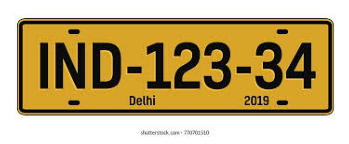

Running inference for /content/TensorFlow/workspace/training_demo/images/test/P9180018.jpg... Done


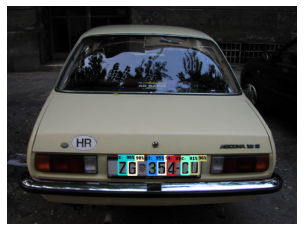

Running inference for /content/TensorFlow/workspace/training_demo/images/test/P9170028.jpg... Done


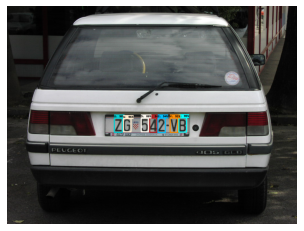

Running inference for /content/TensorFlow/workspace/training_demo/images/test/P9170016.jpg... Done


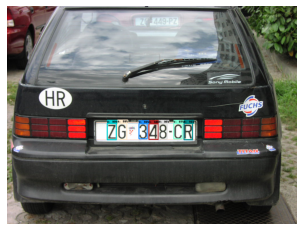

In [ ]:
img=['/content/t1.jpeg','/content/TensorFlow/workspace/training_demo/images/test/P9180018.jpg','/content/TensorFlow/workspace/training_demo/images/test/P9170028.jpg','/content/TensorFlow/workspace/training_demo/images/test/P9170016.jpg']

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def load_image_into_numpy_array(path):
    return np.array(Image.open(path))

for image_path in img:
    print('Running inference for {}... '.format(image_path), end='')
    image_np=load_image_into_numpy_array(image_path)
    input_tensor=tf.convert_to_tensor(image_np)
    input_tensor=input_tensor[tf.newaxis, ...]
    detections=detect_fn(input_tensor)
    num_detections=int(detections.pop('num_detections'))
    detections={key:value[0,:num_detections].numpy()
                   for key,value in detections.items()}
    detections['num_detections']=num_detections
    detections['detection_classes']=detections['detection_classes'].astype(np.int64)
    image_np_with_detections=image_np.copy()
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=100,     
          min_score_thresh=.8,#0.0001      
          agnostic_mode=False)
    %matplotlib inline
    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
    plt.axis('off')
    plt.show()